#### Question1: 1) Delivery_time -> Predict delivery time using sorting time 

##### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

#### <font color = 'Brown'> Loading the dataset for building model </font>

In [3]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### <font color ='Brown'> EDA 

Statistical Analysis for data

In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


#### Finding the dimensions of dataset

In [5]:
rows,col=df.shape
print('No of rows',rows ,'and number of columns are ',col)

No of rows 21 and number of columns are  2


#### Finding the schema of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


#### Checking Data type of columns

In [7]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

#### <font color='brown'>As we can see that the datatypes of dataset looks fine.

#### Checking for null values

In [8]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

#### <font color='Brown'>As we have found that there is not null values in dataset.

#### Checking for duplicate values

In [9]:
df.duplicated().sum()

0

#### <font color= ' Brown'>As we can see that there is no invalid values , duplicates or null values in our dataset. We can proceed with further steps.
   

### VISUALISATION

array([[<Axes: title={'center': 'Delivery Time'}>,
        <Axes: title={'center': 'Sorting Time'}>]], dtype=object)

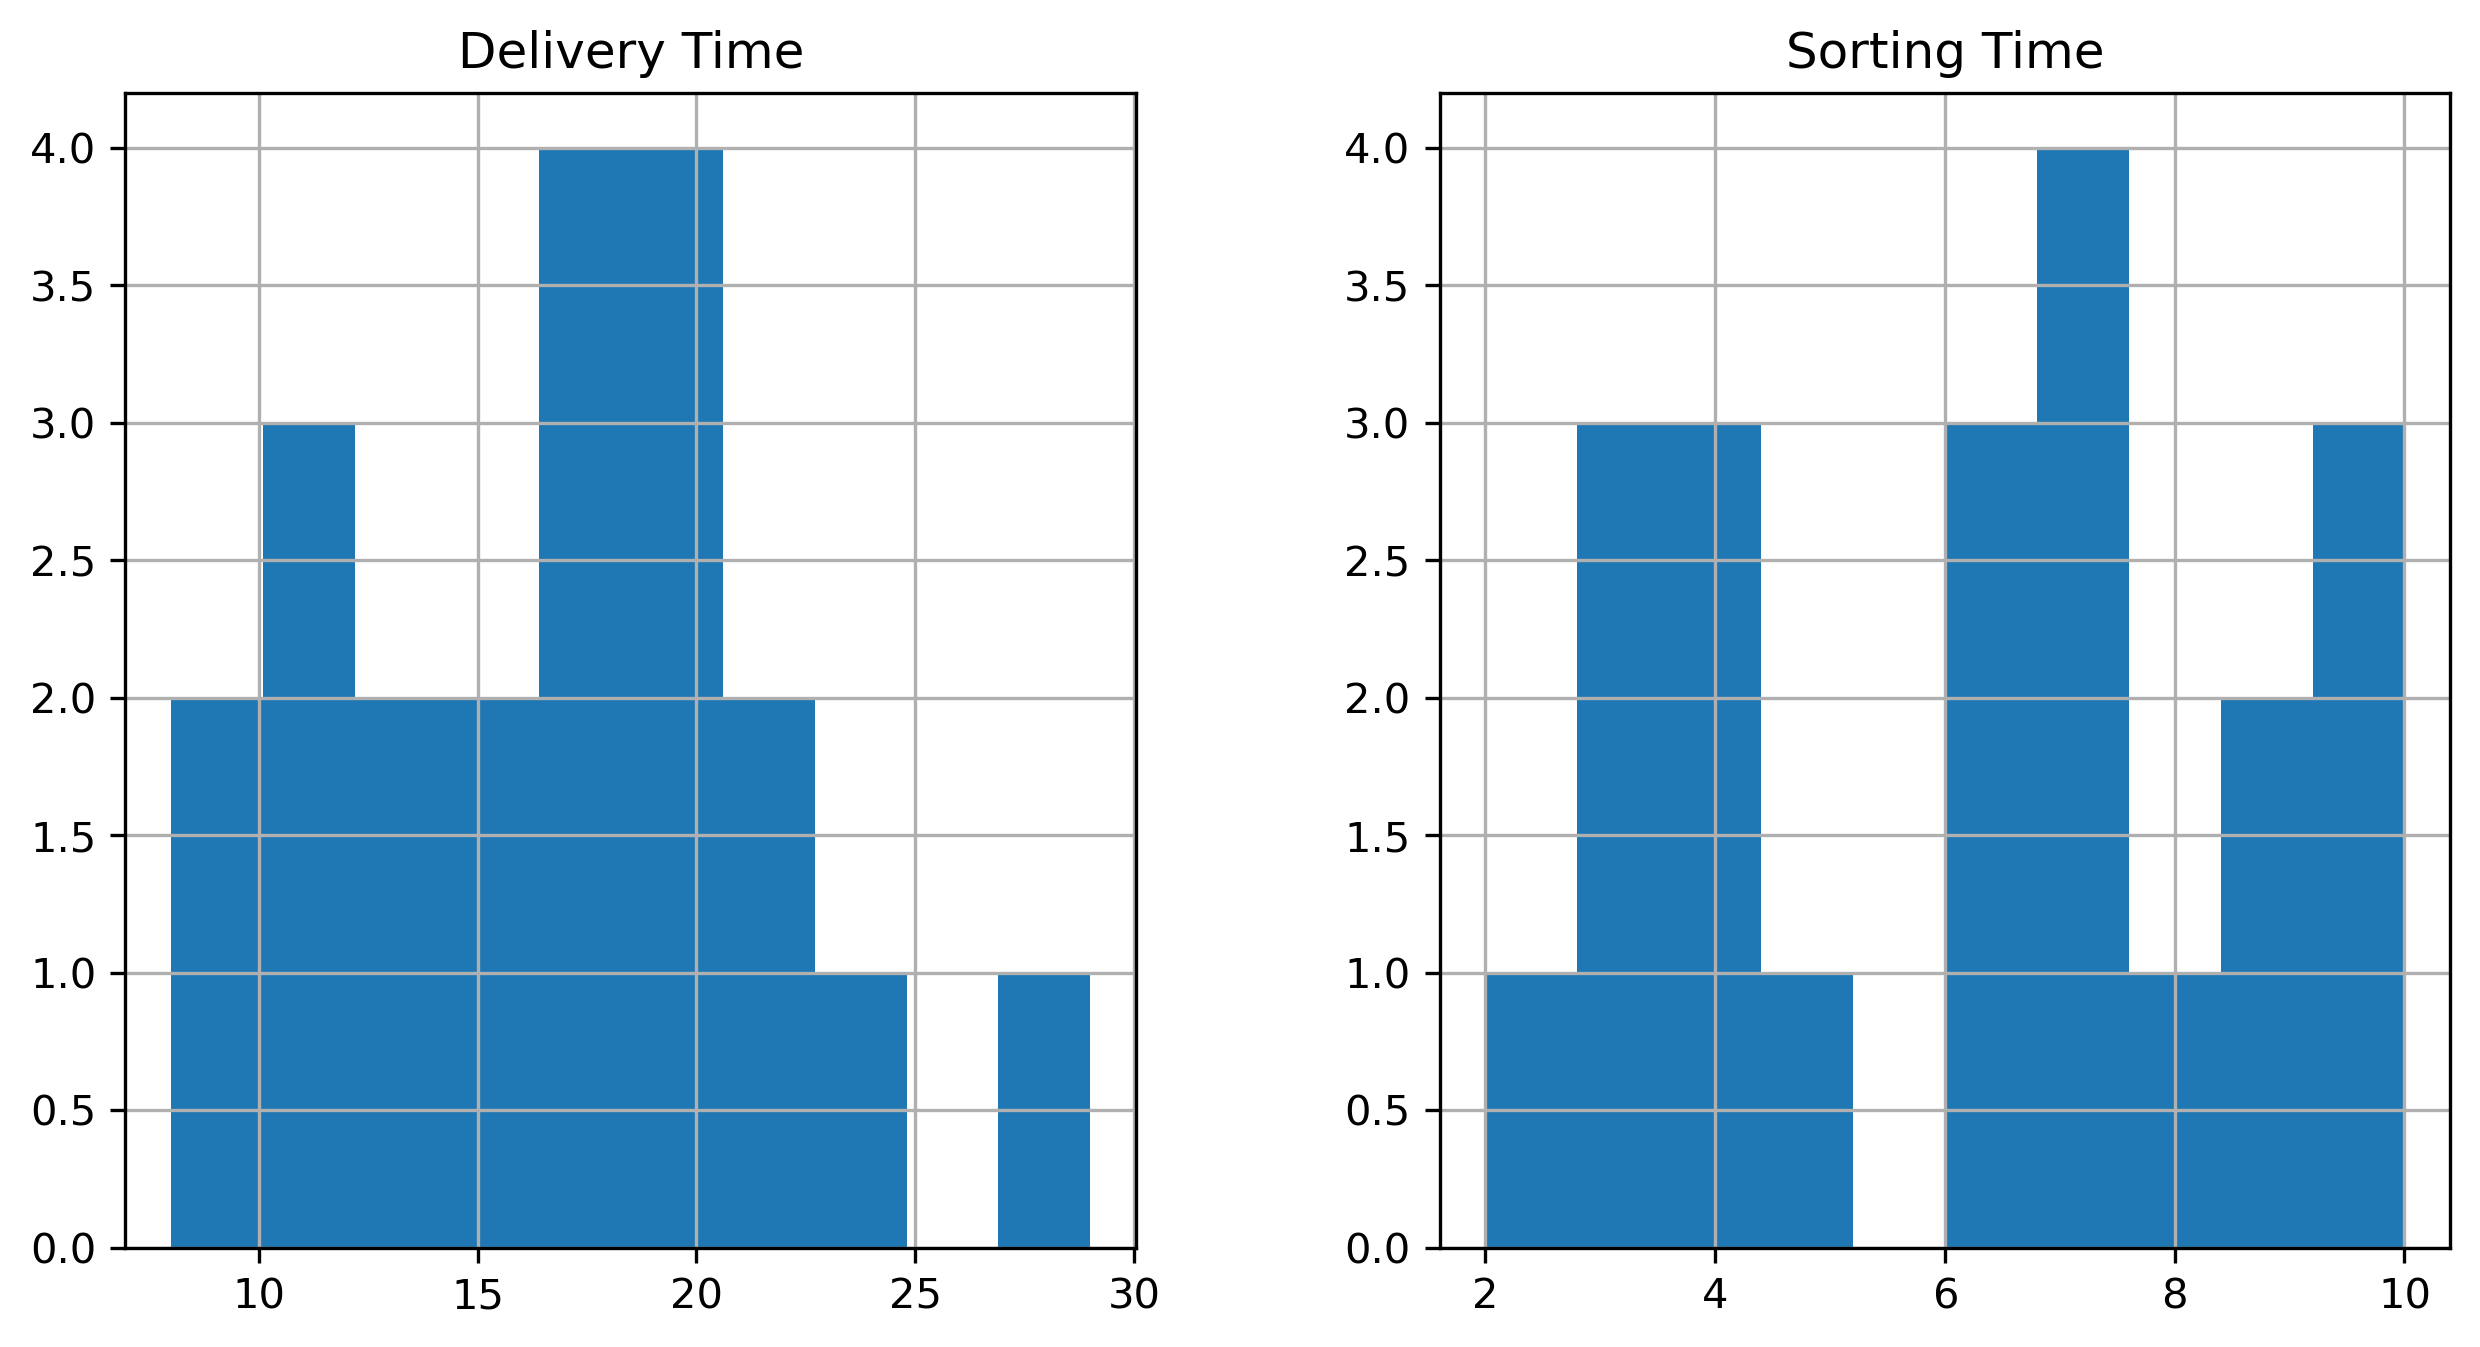

In [10]:
df.hist()

<Axes: >

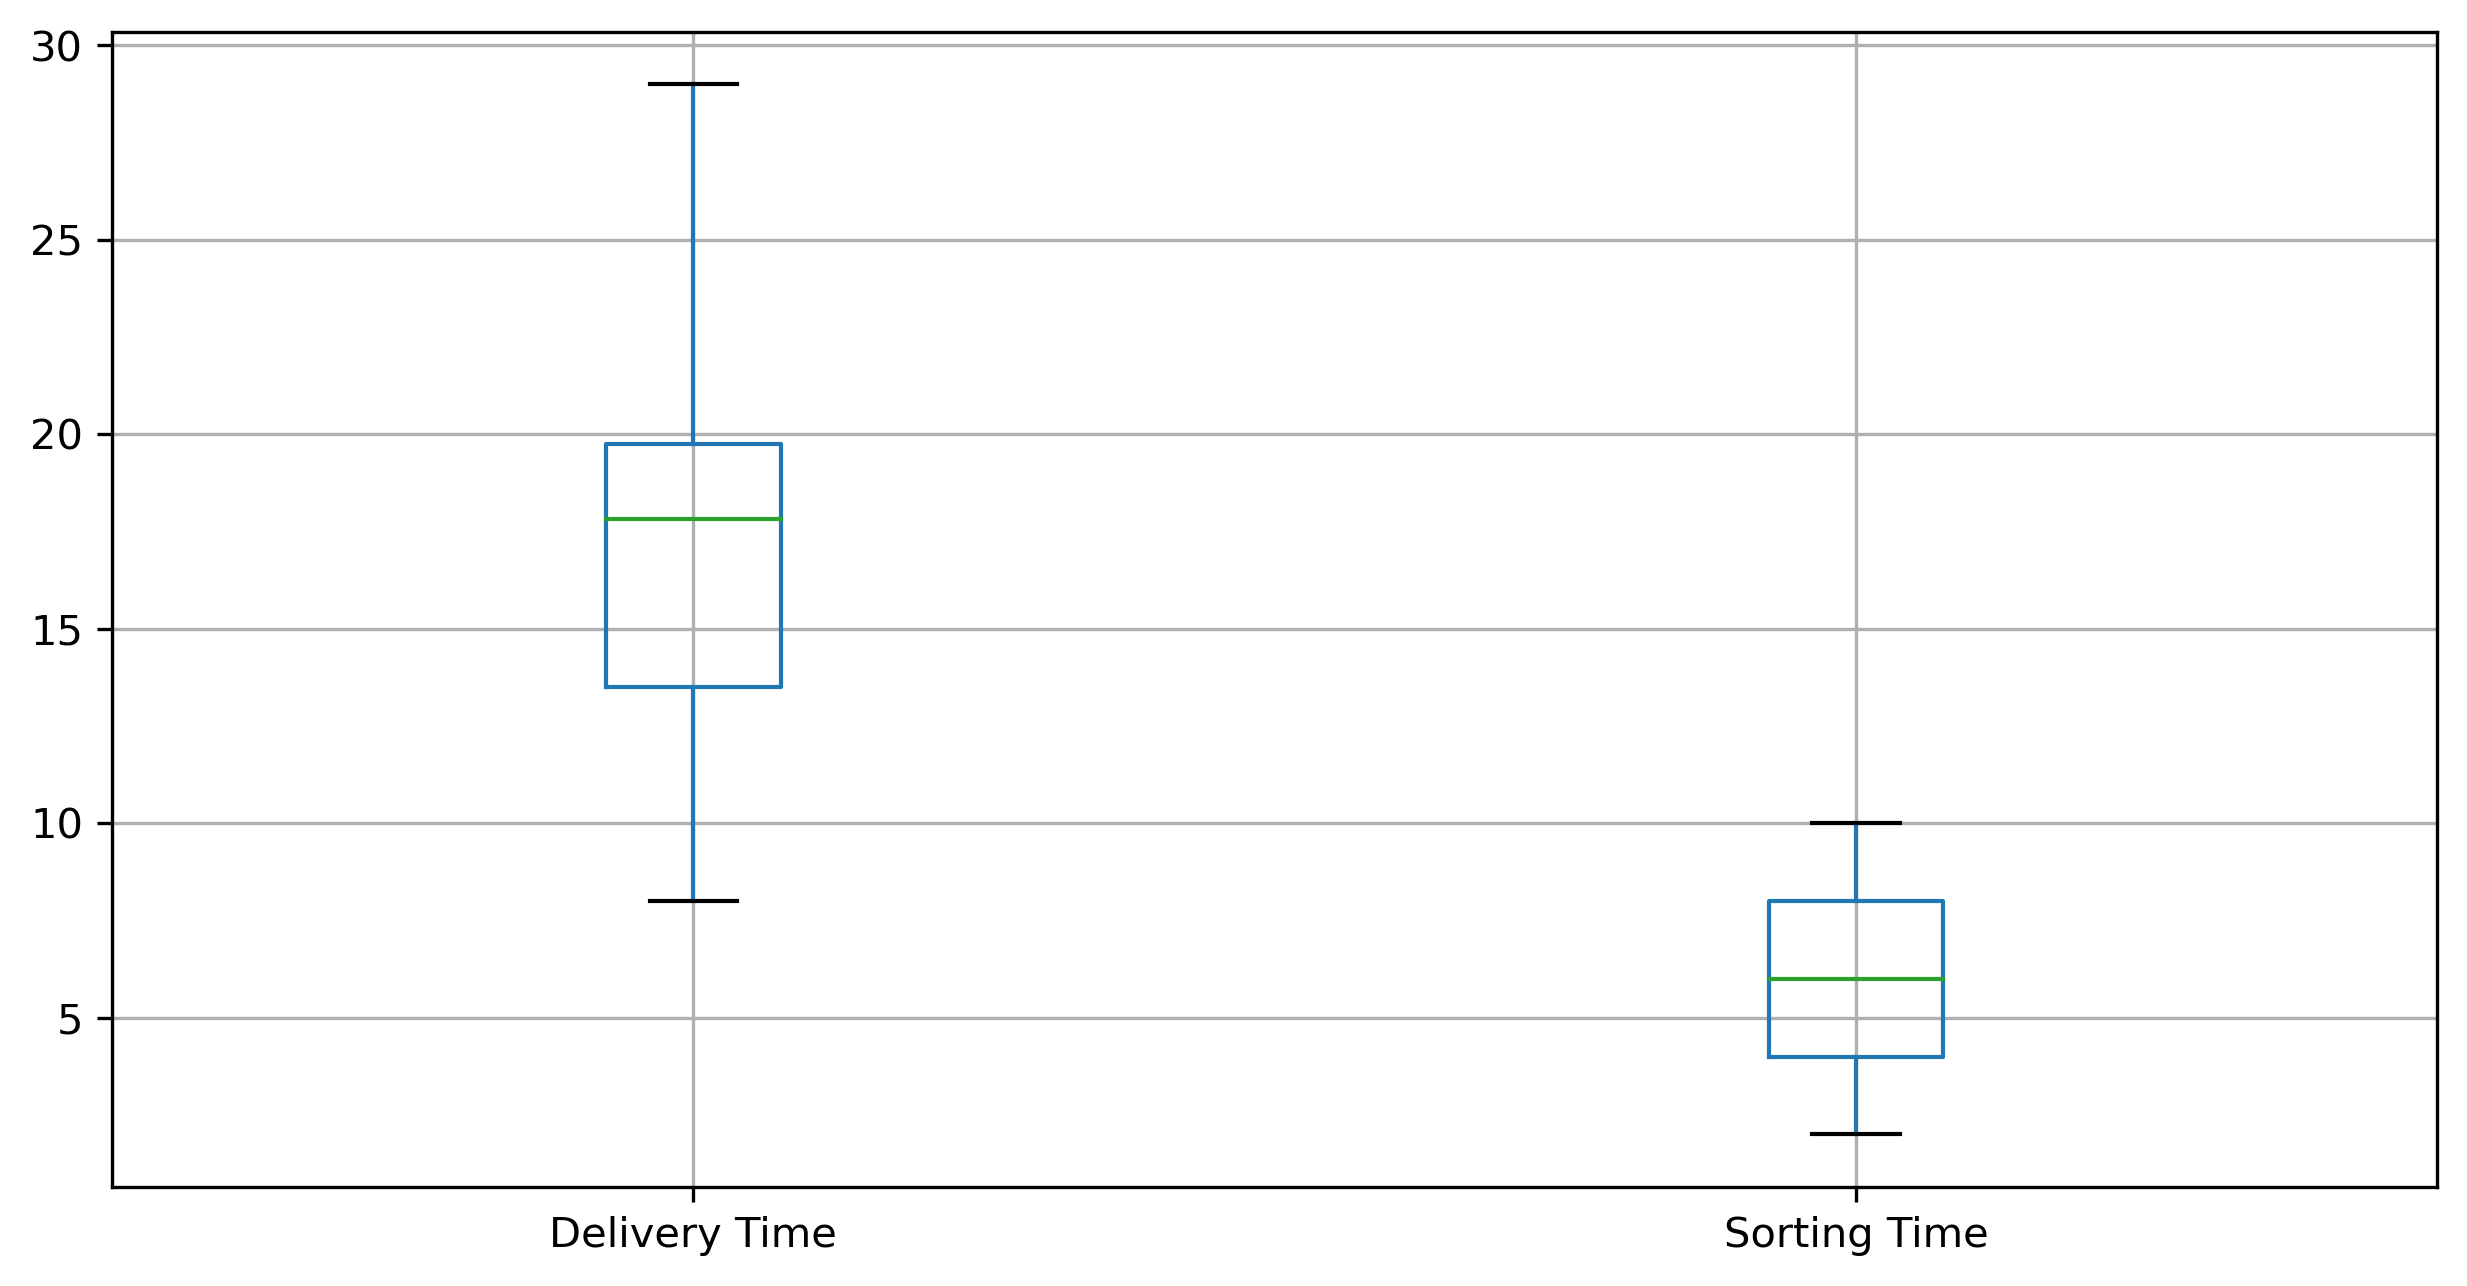

In [11]:
df.boxplot()

#### <font color='Brown'>As we can see that the columns doesn't have outliers.

<Axes: xlabel='Delivery Time', ylabel='Density'>

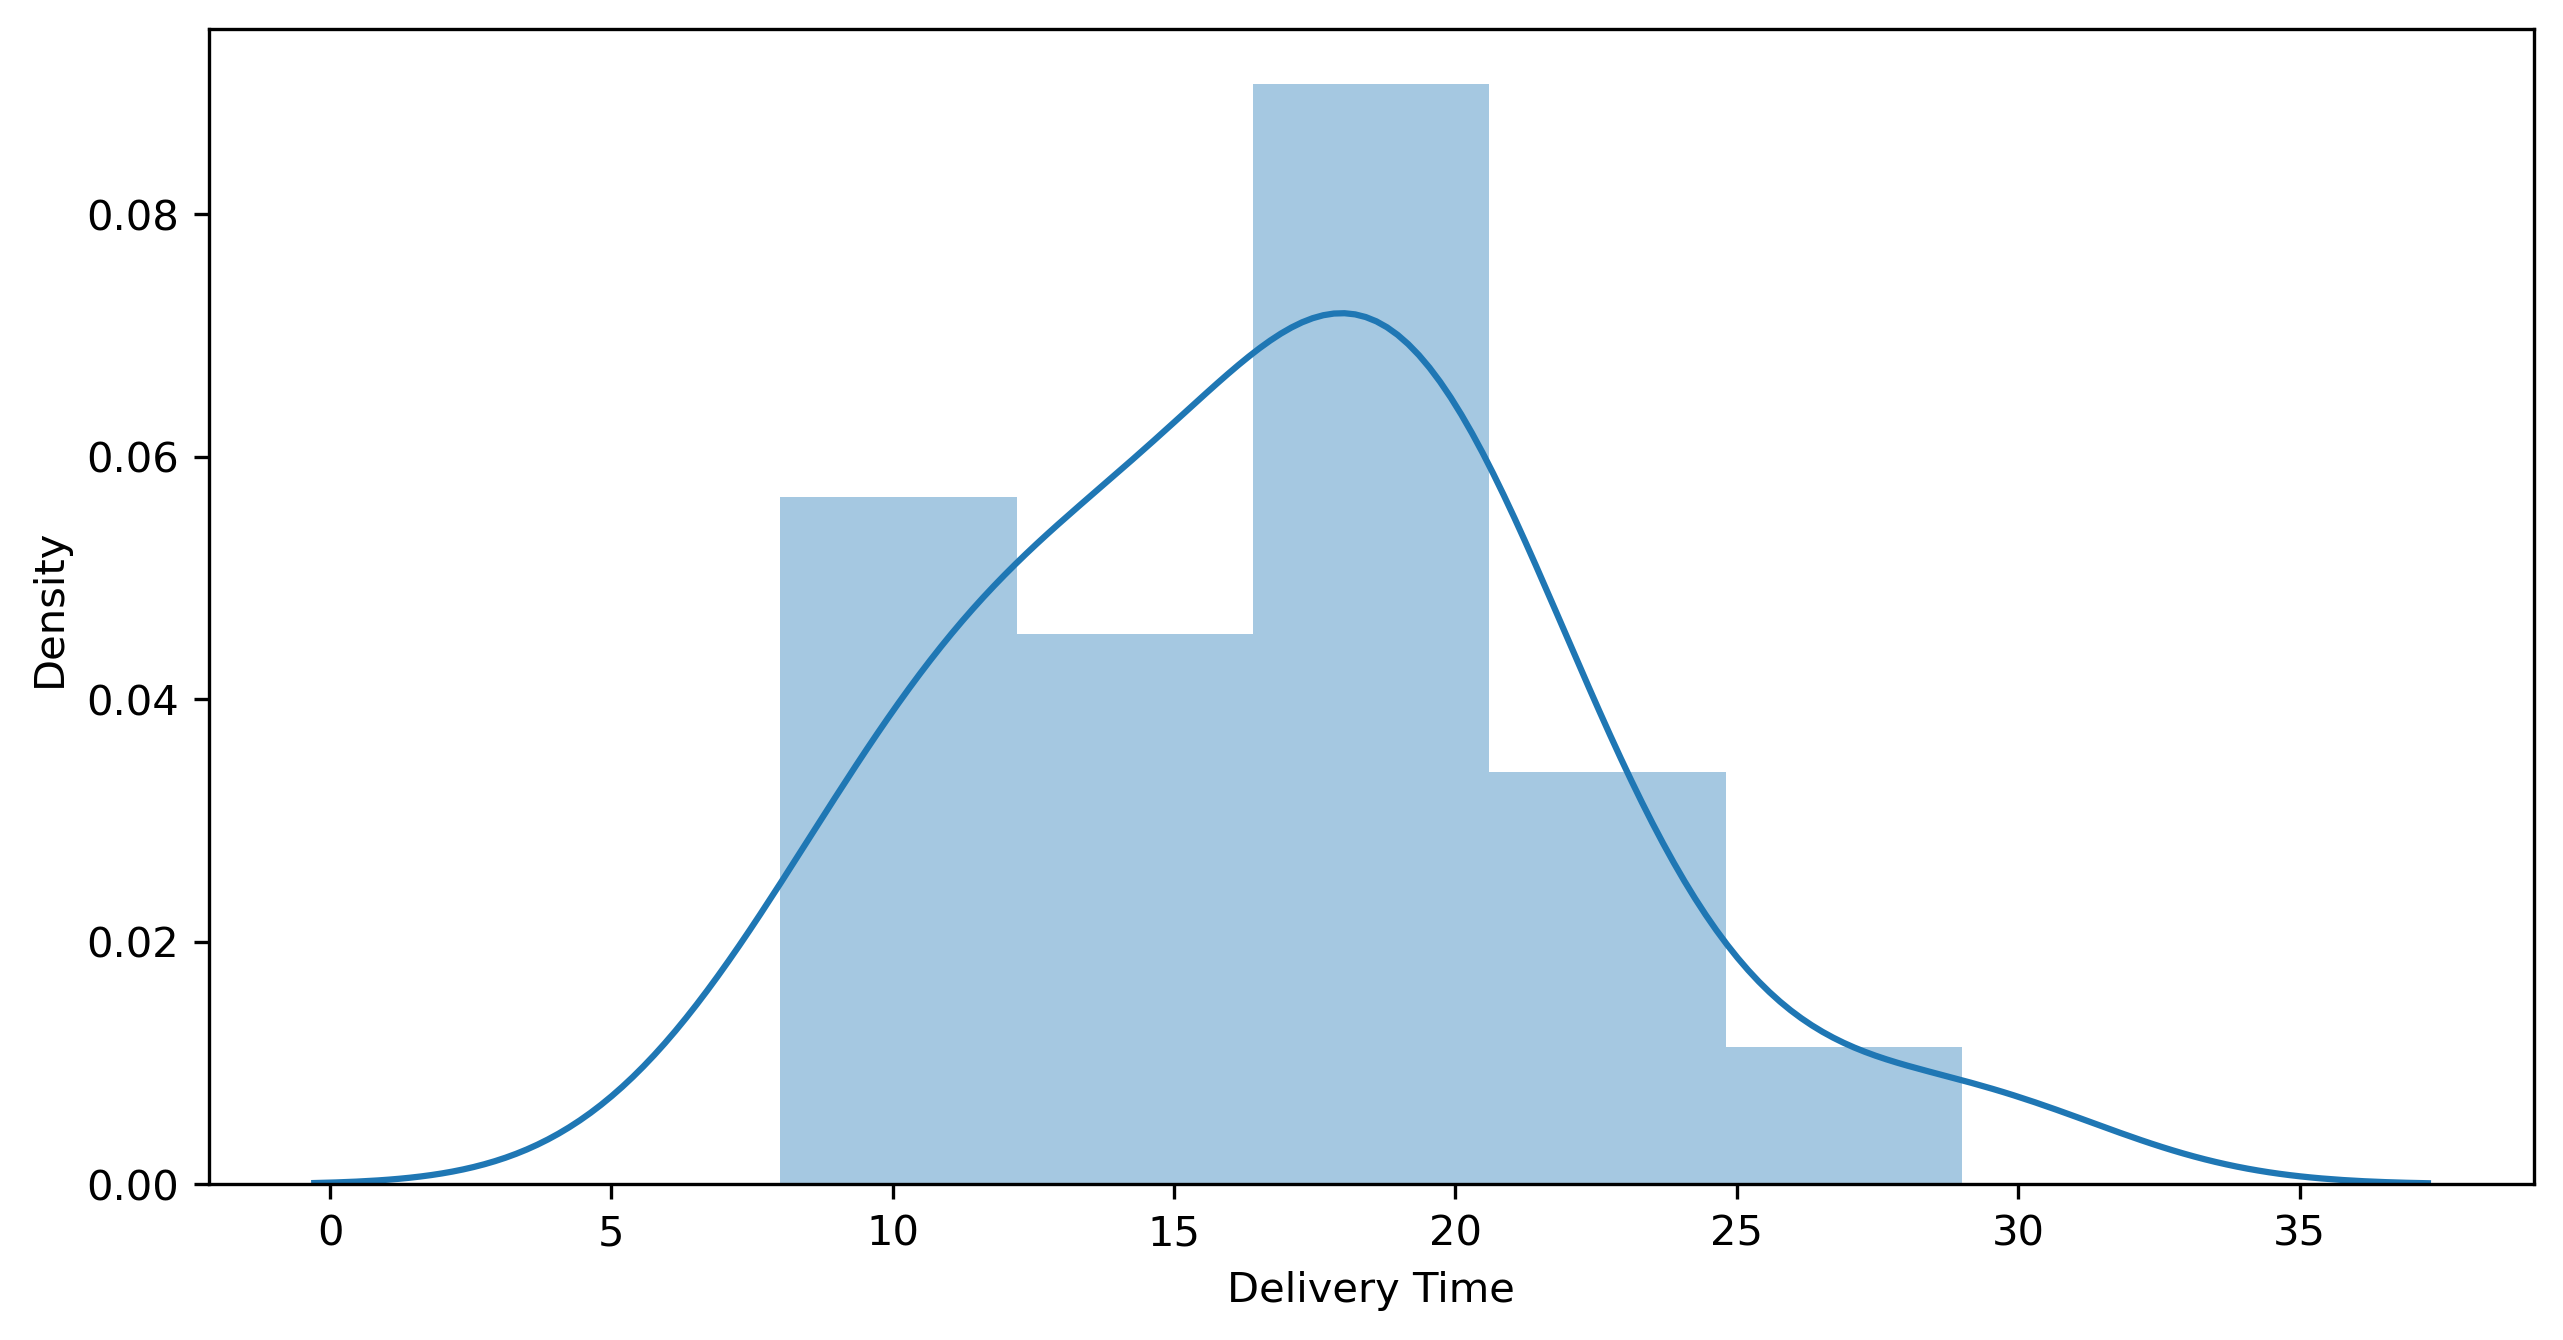

In [12]:
sns.distplot(df['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

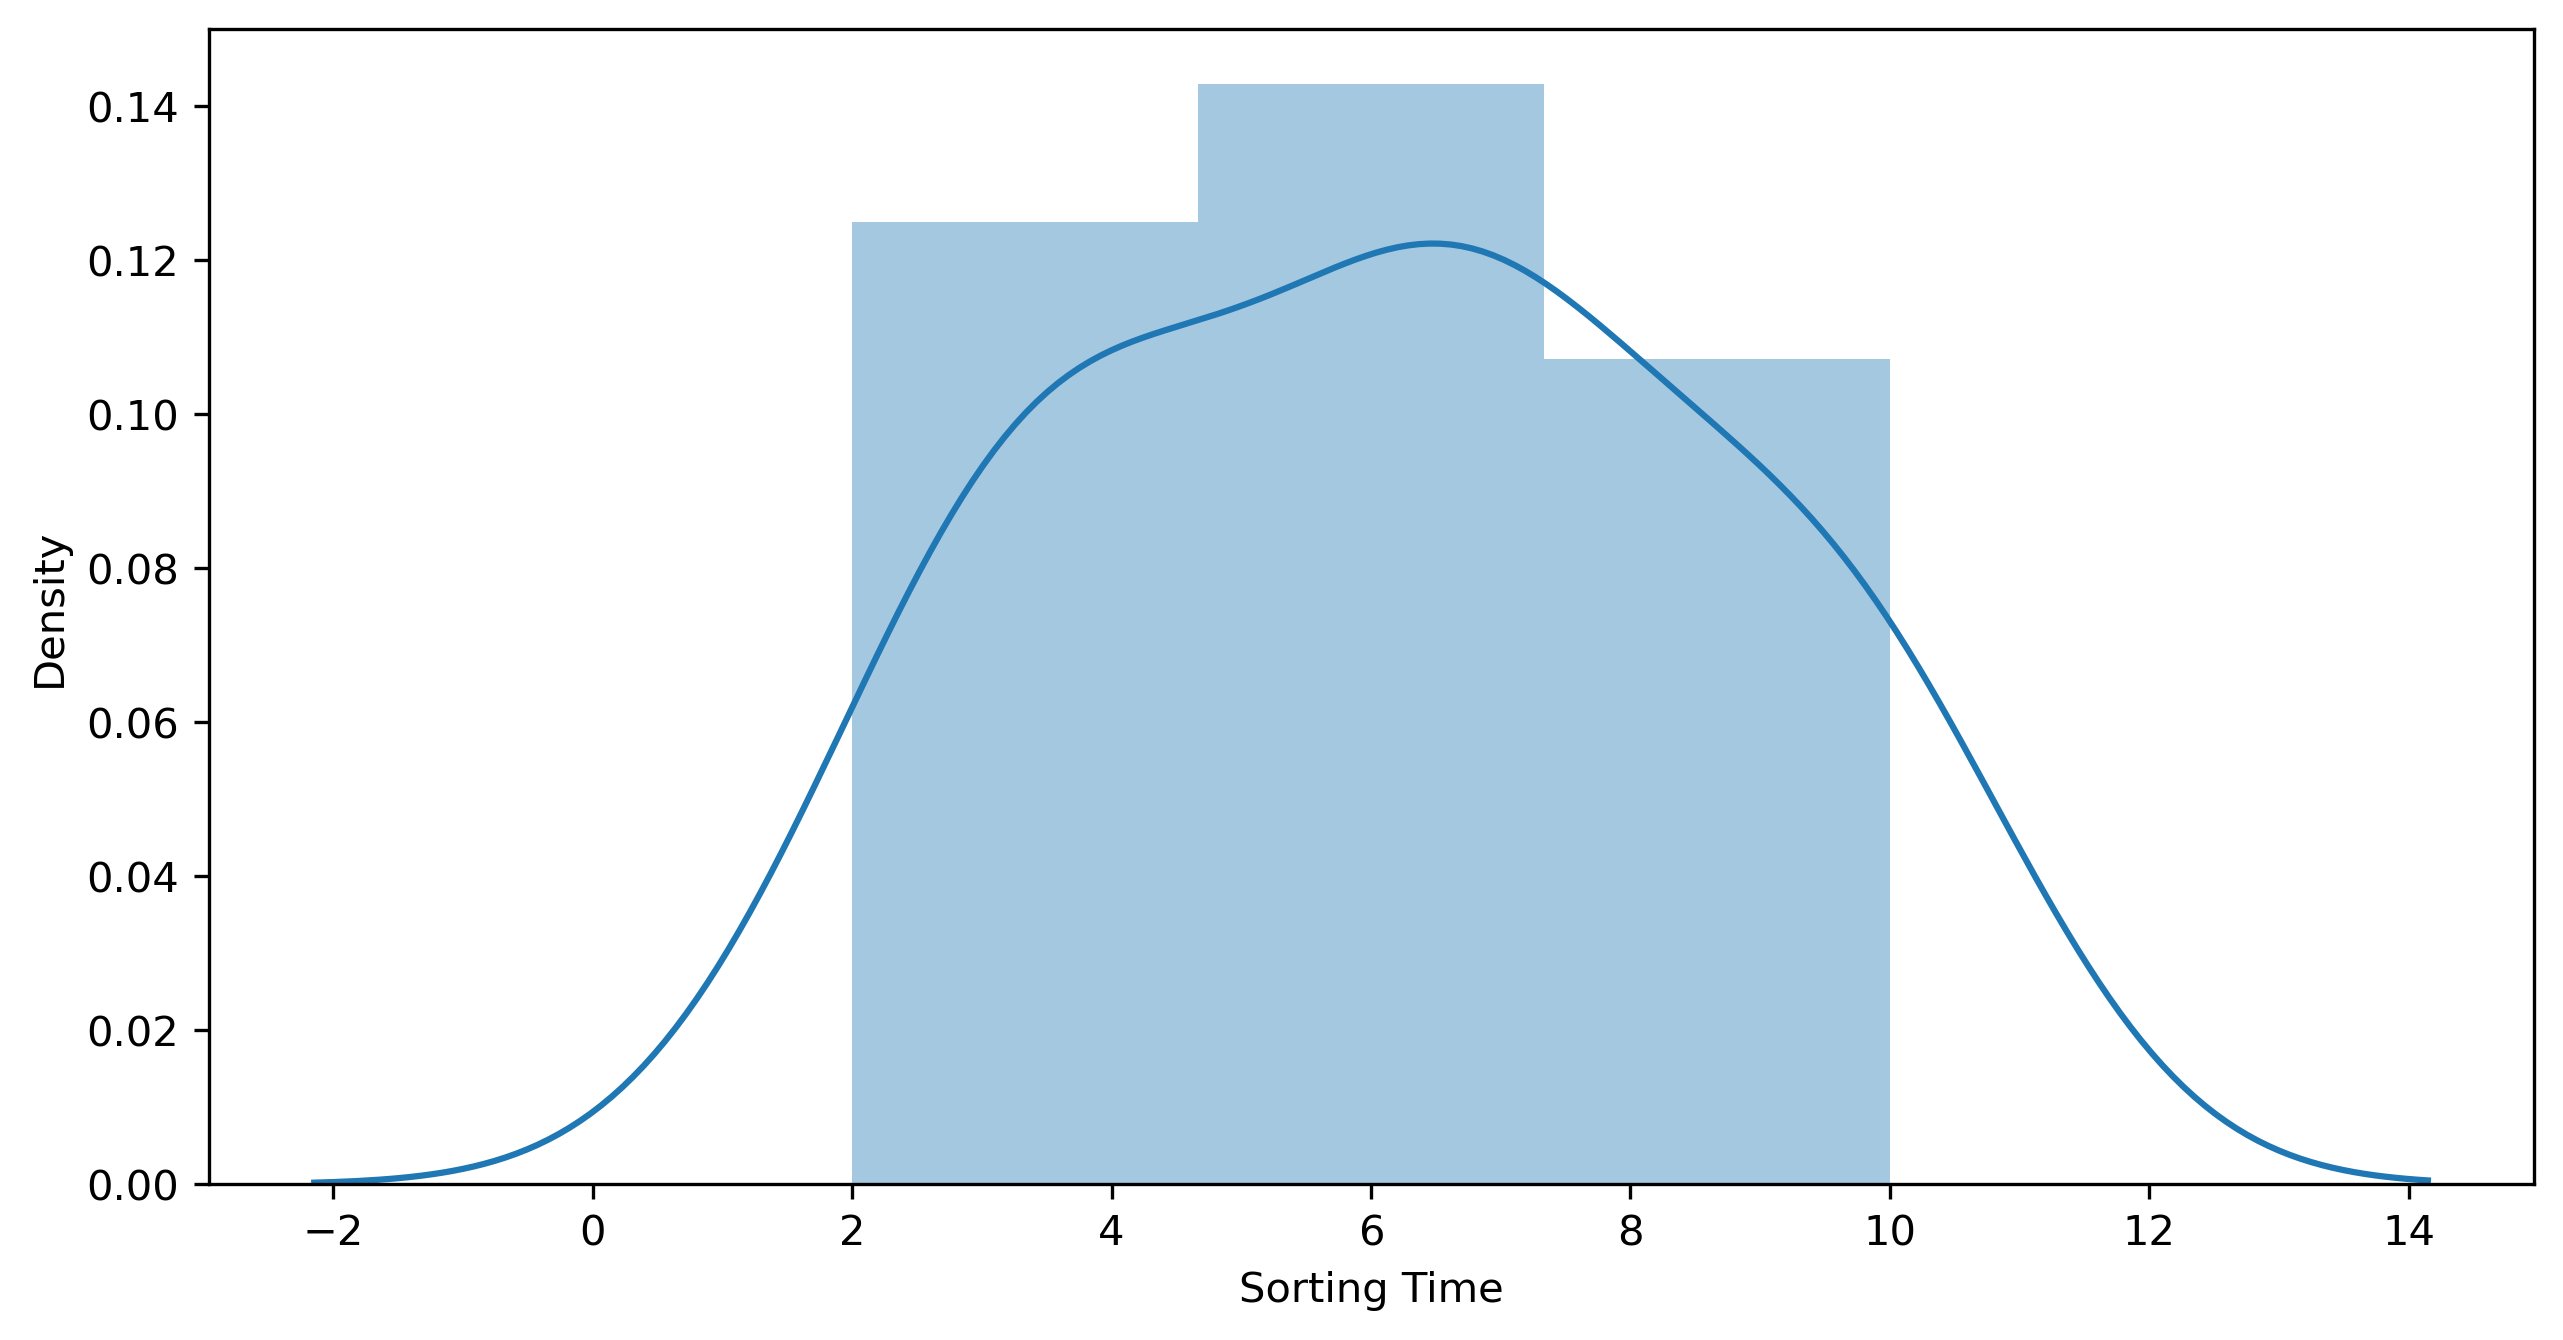

In [13]:
sns.distplot(df['Sorting Time'])

#####  <font color = 'Brown'>Upon seeing the above graphs we can say that there is no outliers in given dataset further we can check for correlation between the coloums. </font> 

In [14]:
# Renaming Column
df1=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### Correlation Analysis

In [15]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


#### Visualing the correlation

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

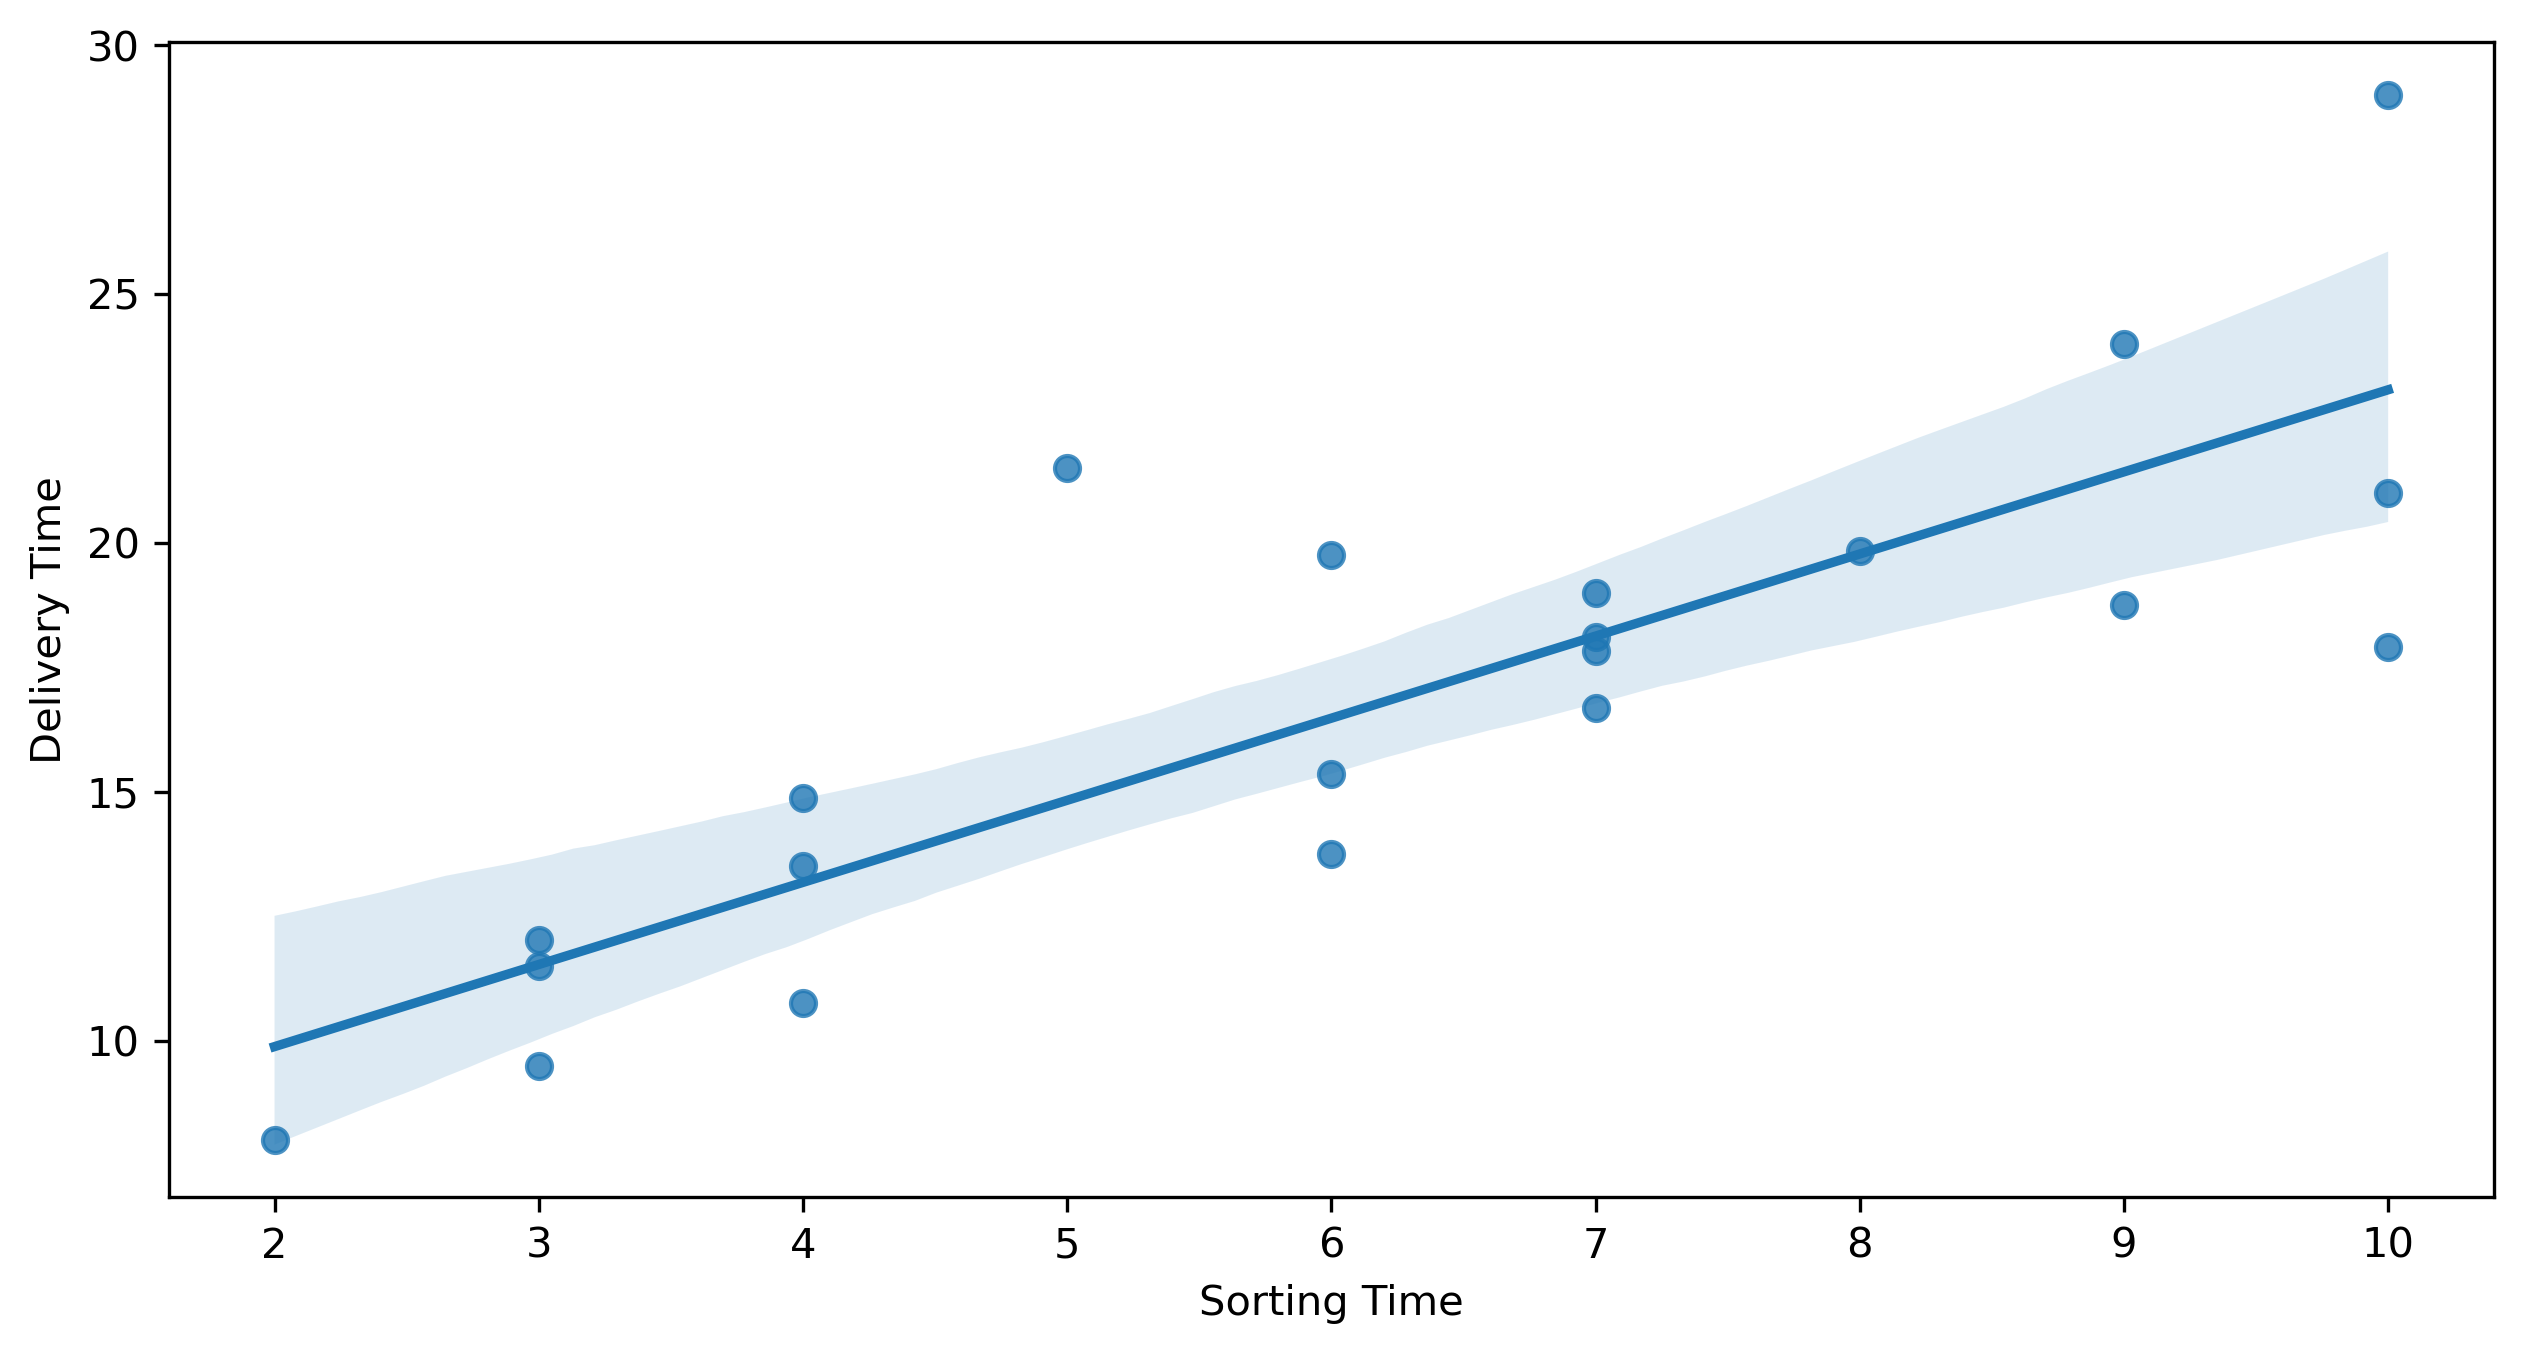

In [16]:
sns.regplot(x=df['Sorting Time'], y=df['Delivery Time'])

<Axes: >

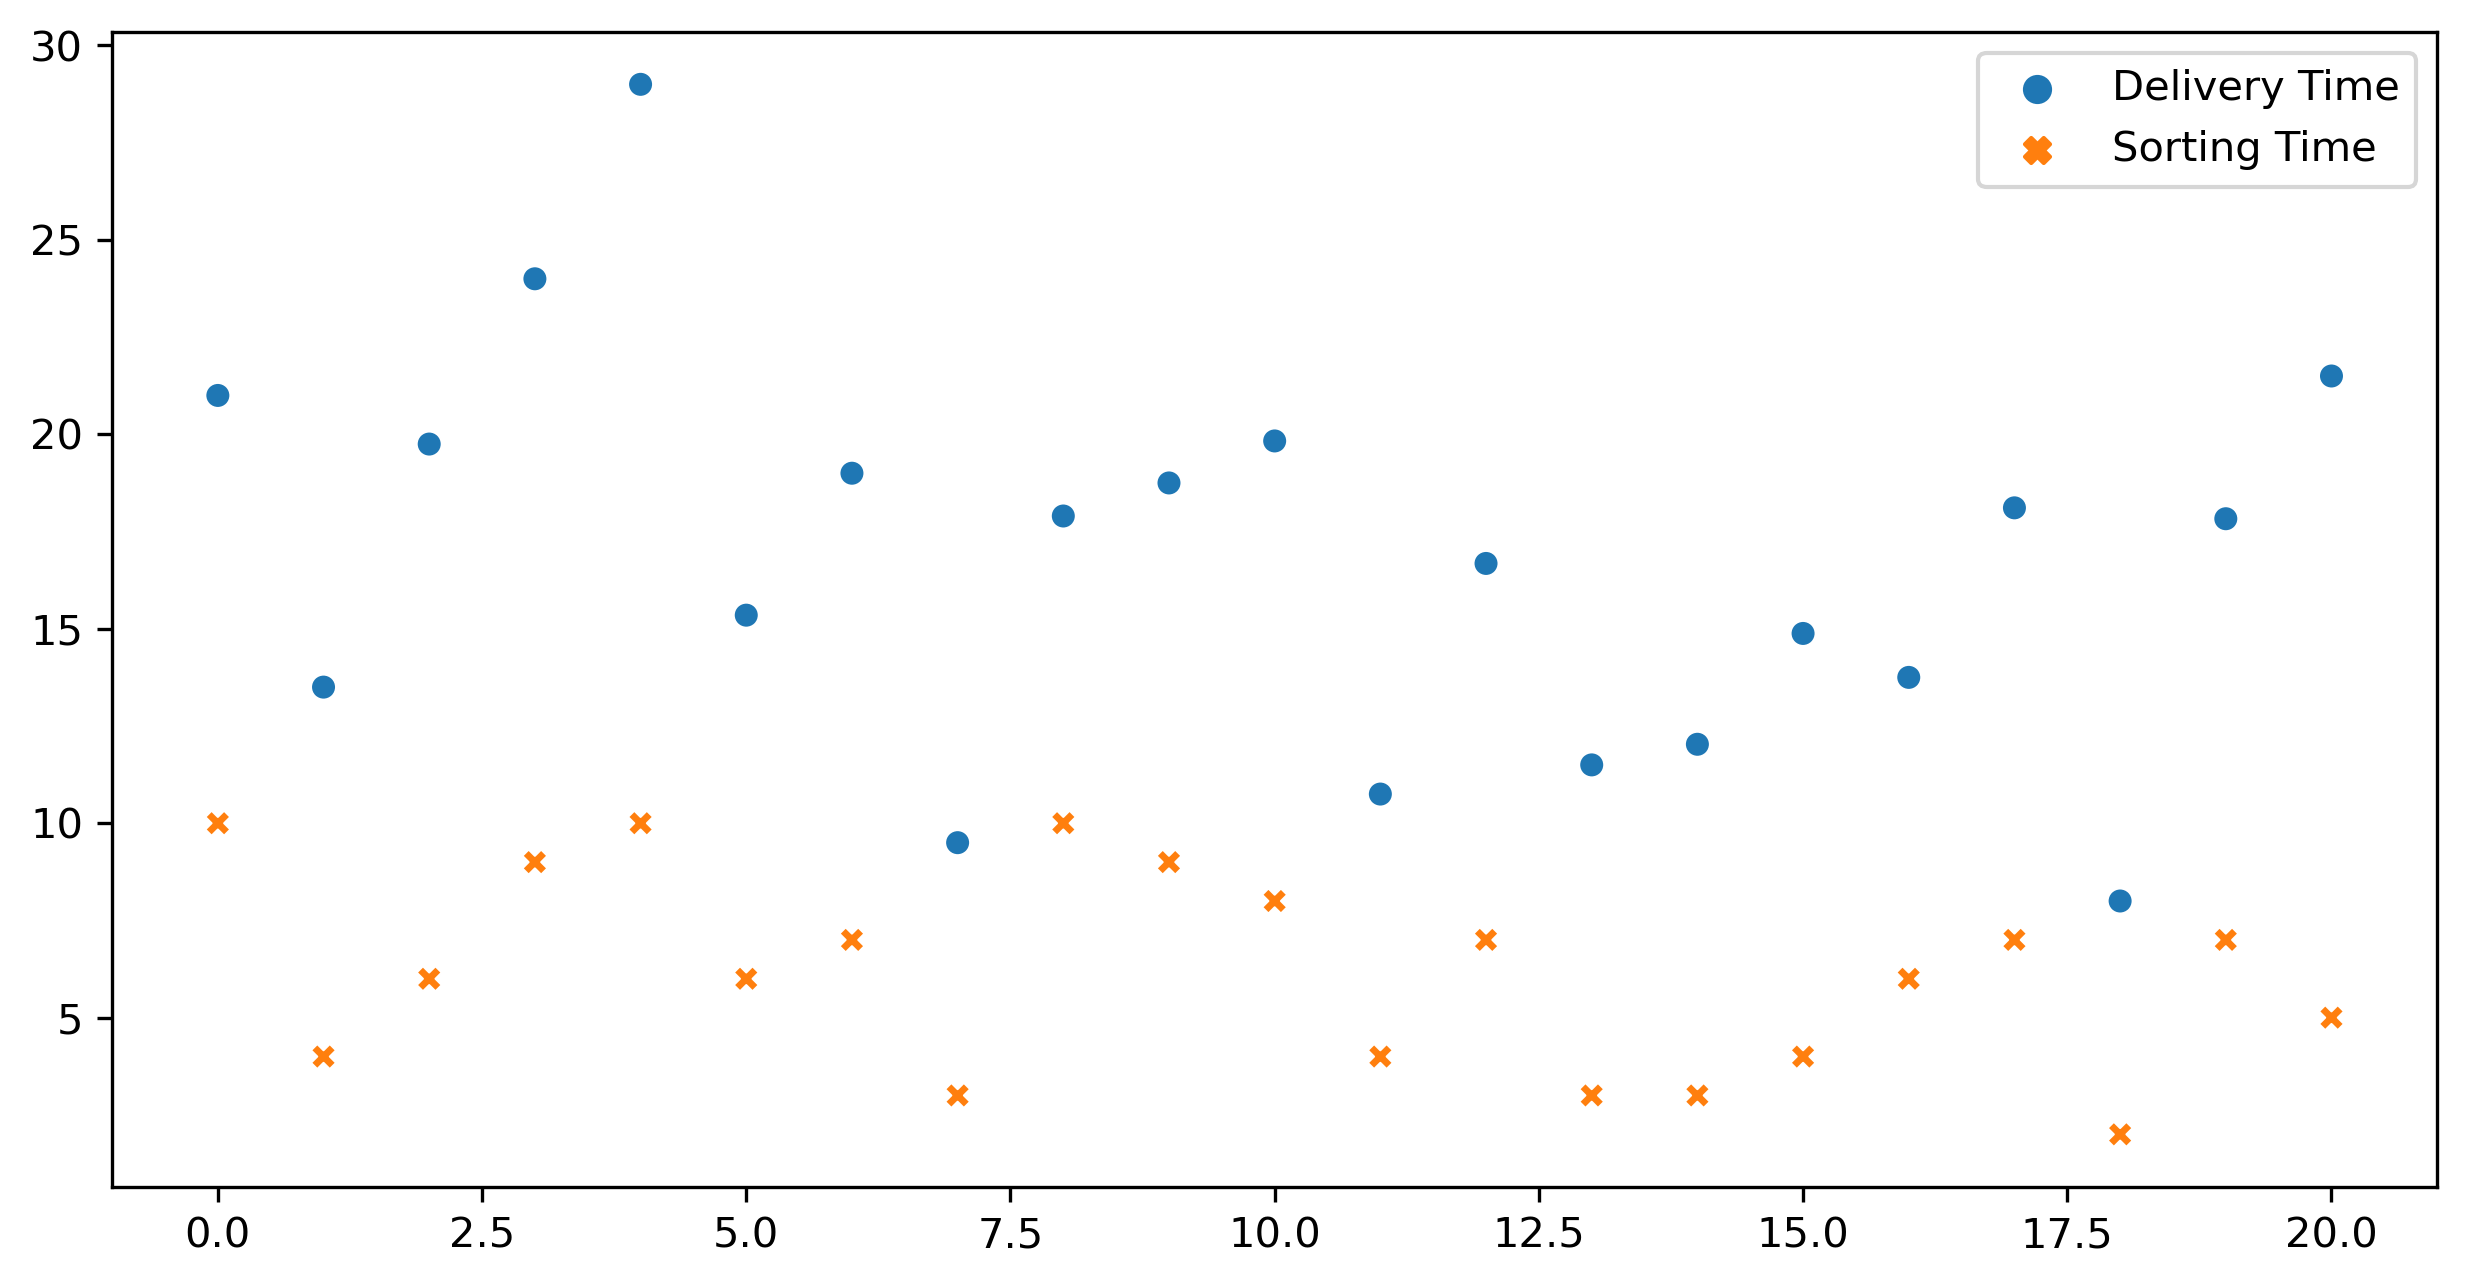

In [17]:
sns.scatterplot(df)

<Axes: >

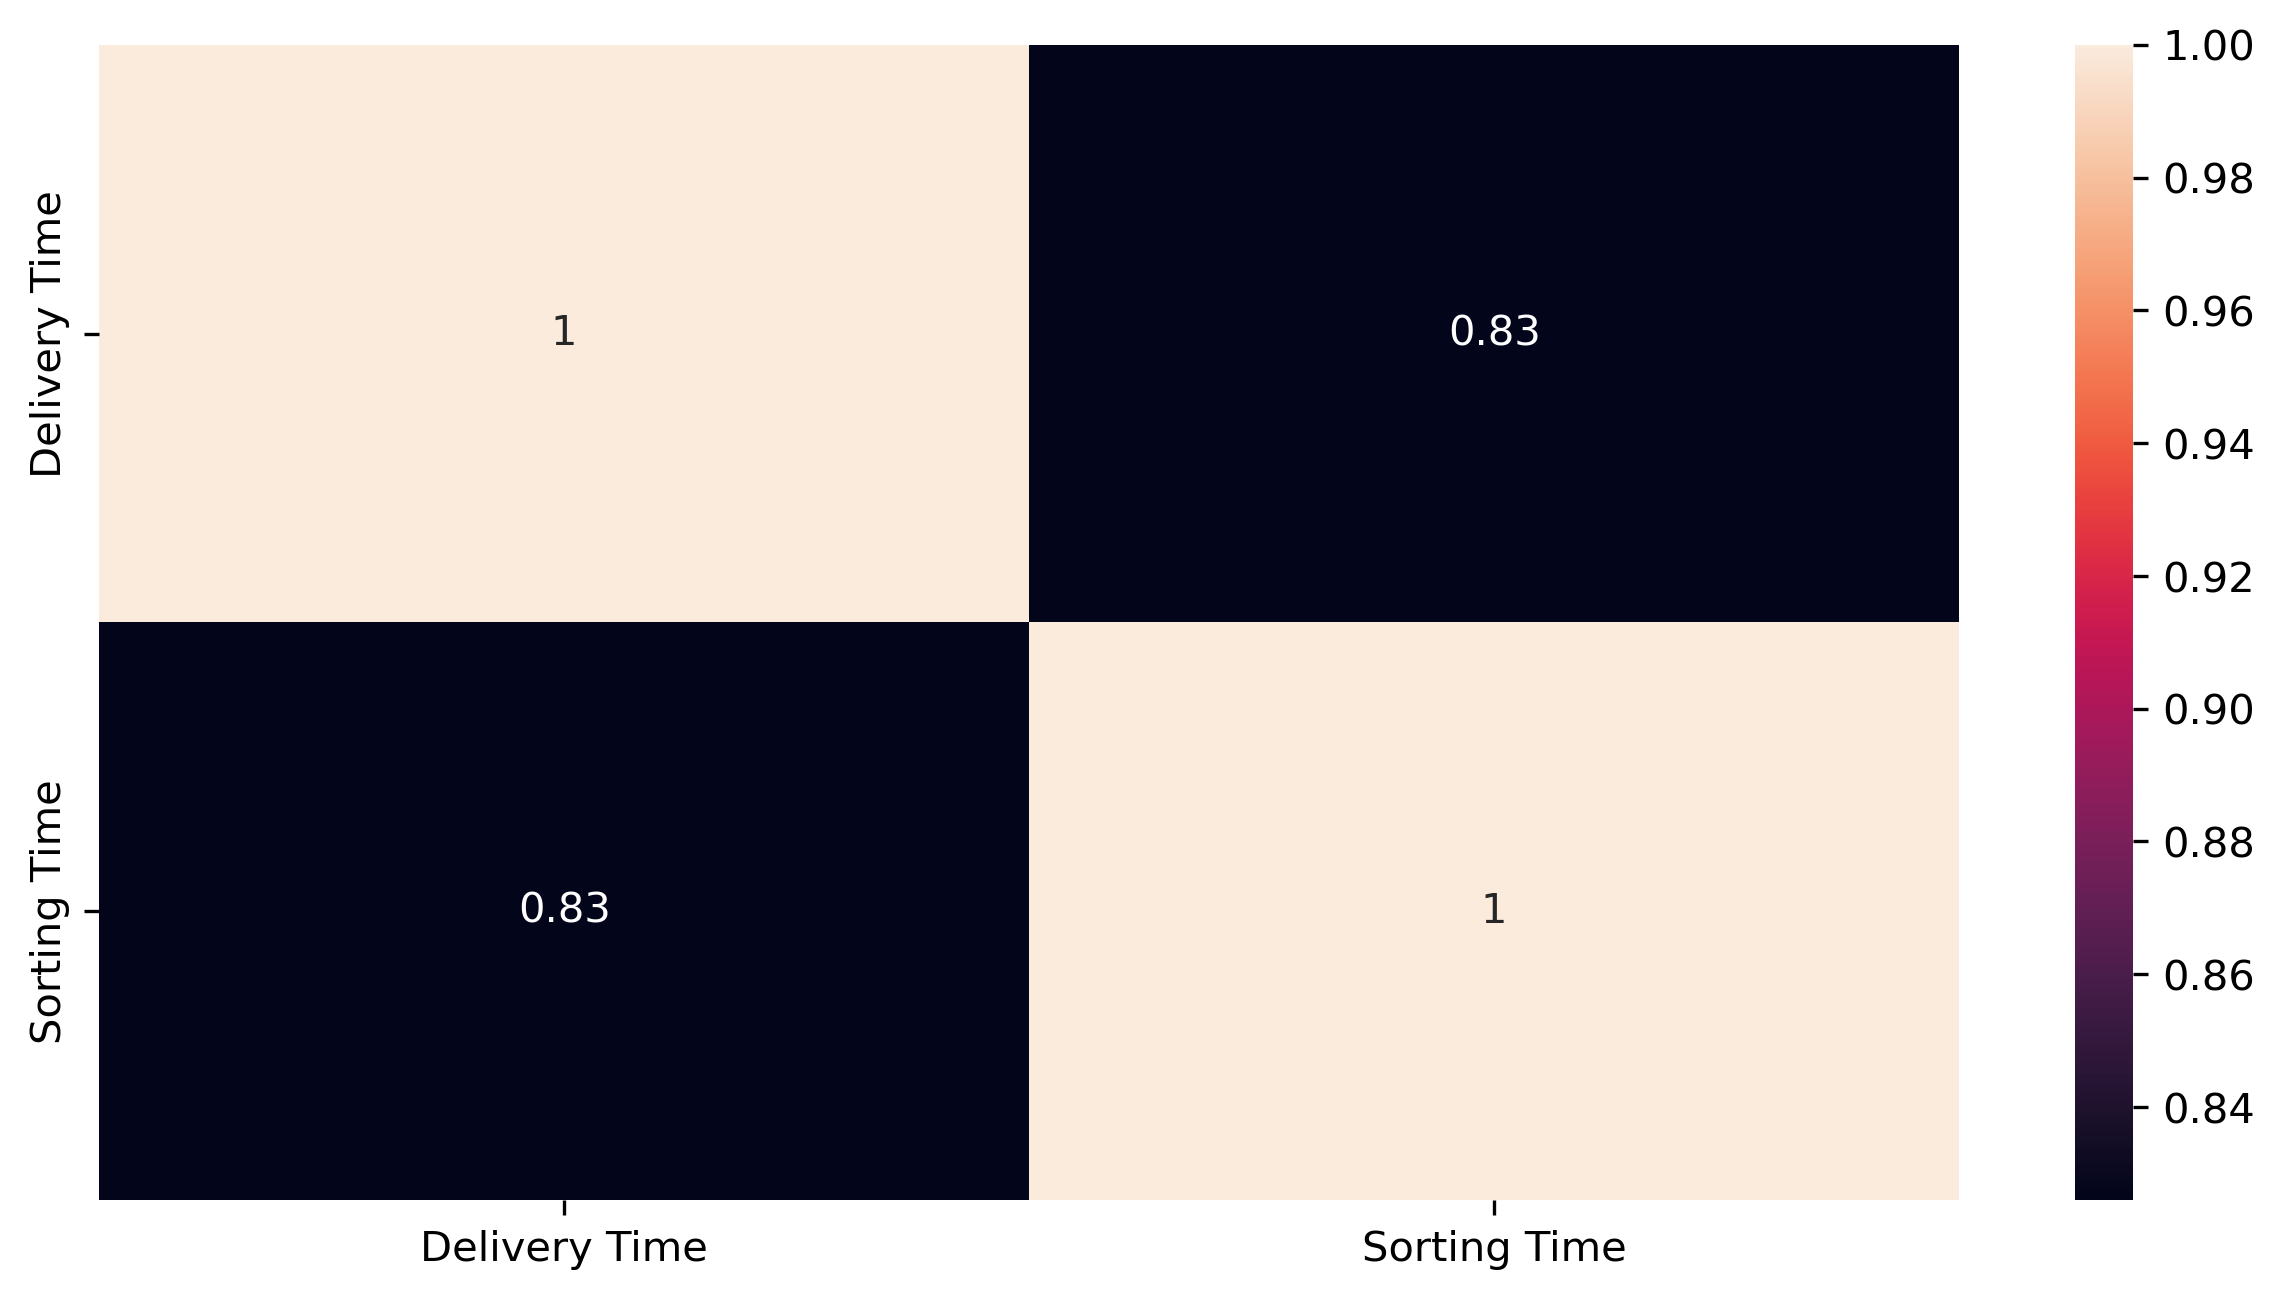

In [18]:
sns.heatmap(df.corr(),annot=True)

#### <font color= 'Brown'>  Upon checking the above graphs and correlation coefficent we can say that there is good correlation between the two variable.The score is more than 0.8 which is a good sign.

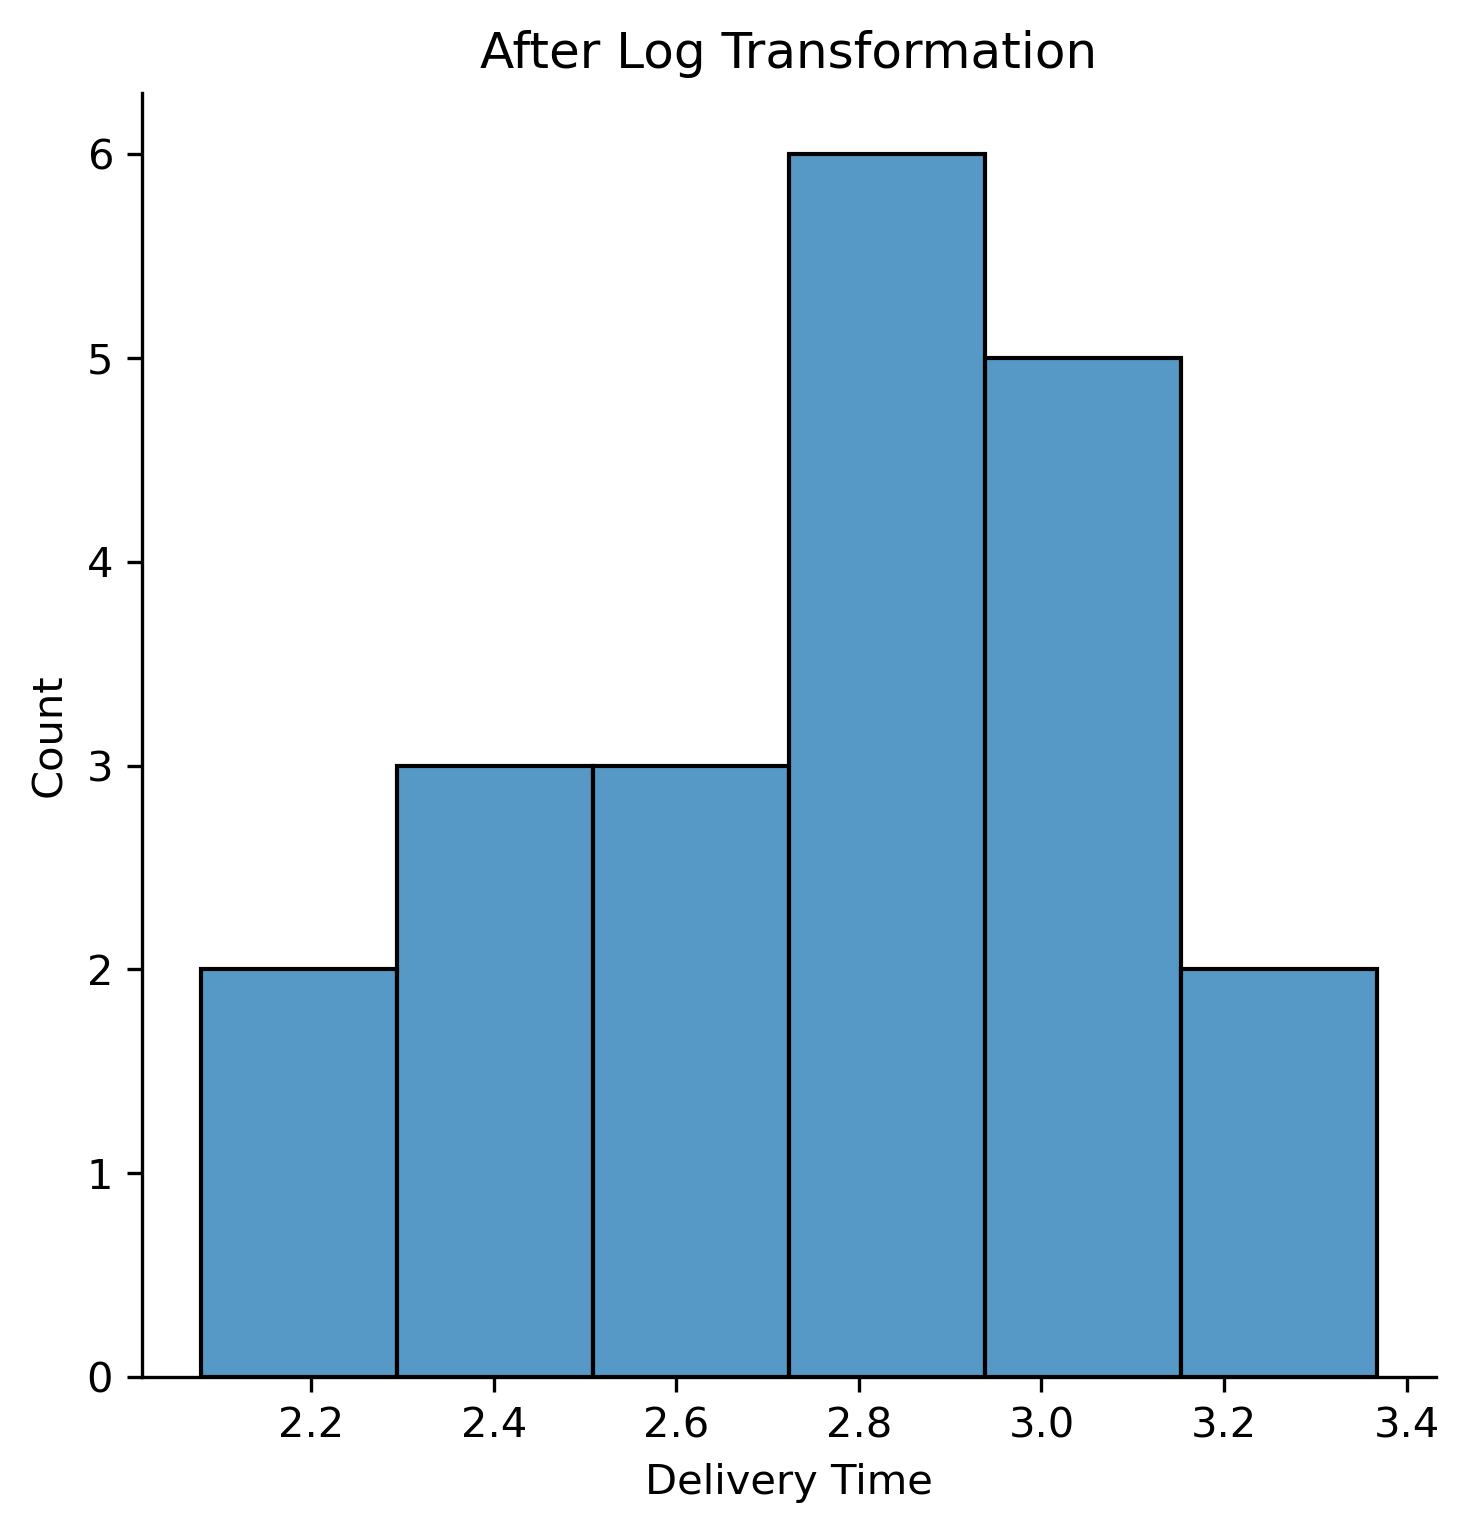

In [51]:
sns.displot(np.log(df['Delivery Time']), bins = 6)
plt.title('After Log Transformation')
plt.show()

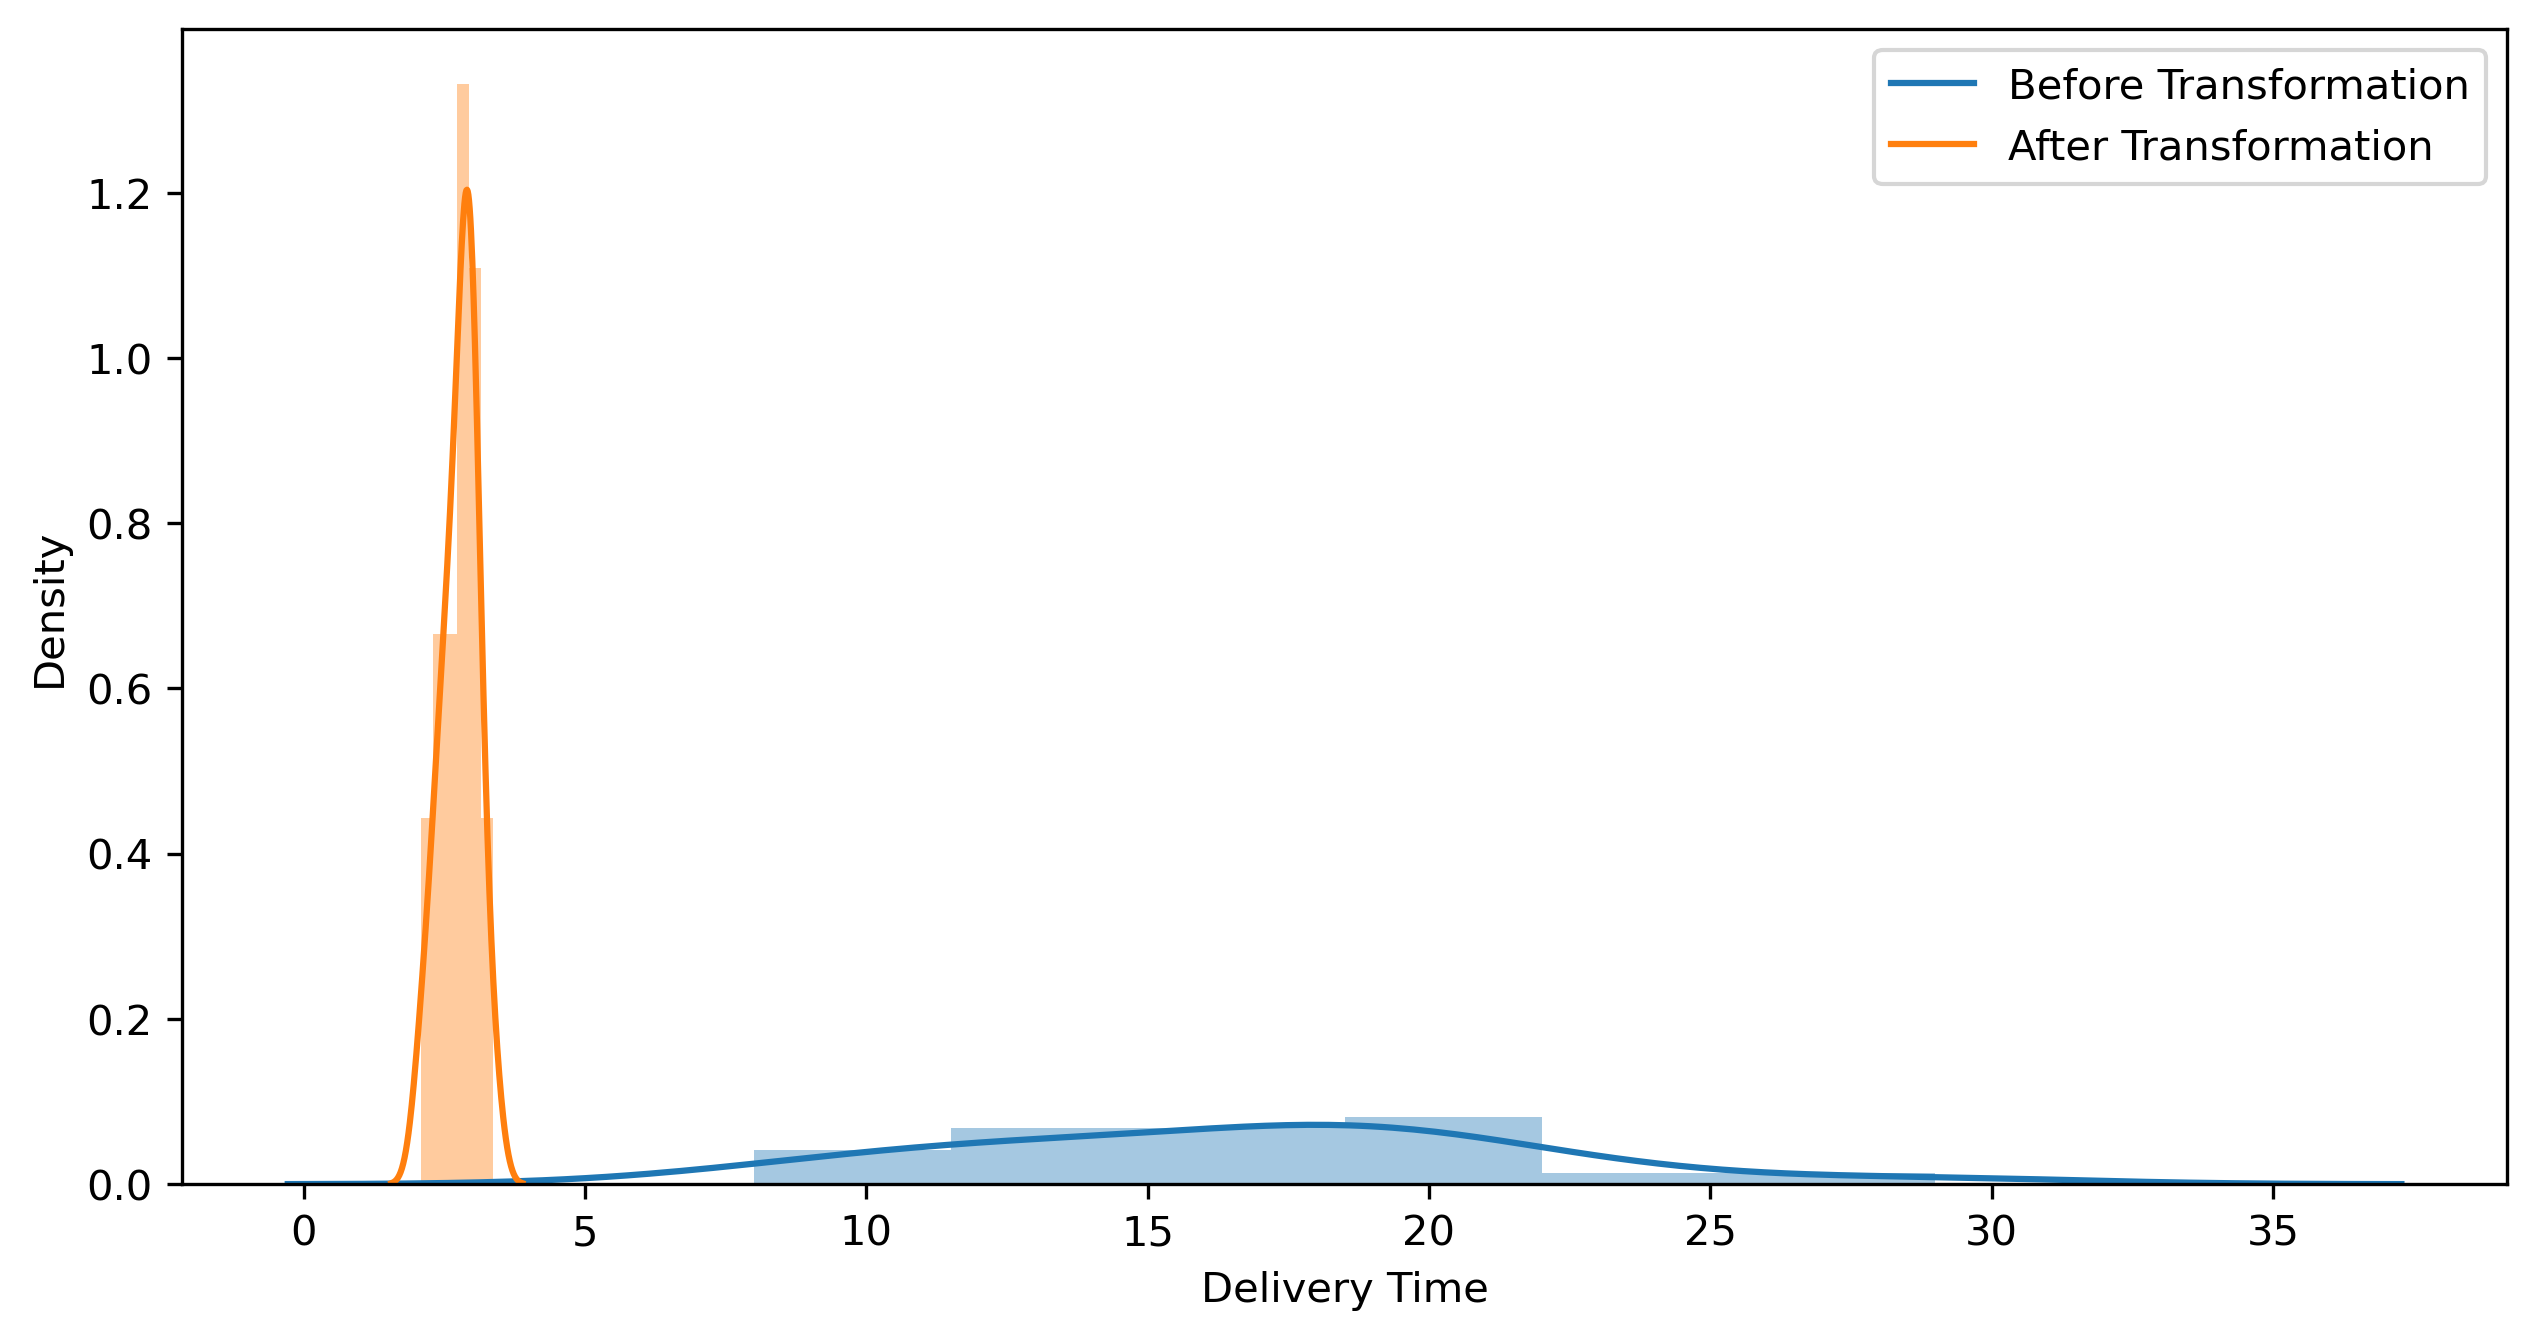

In [50]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Delivery Time'], bins = 6, kde = True)
sns.distplot(np.log(df['Delivery Time']), bins = 6, kde = True)
plt.legend(labels)
plt.show()

#### Fitting a Linear Regression Model

In [39]:
model=smf.ols("delivery_time~sorting_time",data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        12:18:04   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  As you can notice in the above model
###### The R-squared and Adjusted R-squared scores are still below 0.85.(It is a recommeneded to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
###### Lets Try some data transformation to check whether these scores can get any higher than this.


### Log transformation

In [72]:
log_model = smf.ols('np.log(delivery_time)~np.log(sorting_time)', data = df1).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Mon, 19 Feb 2024   Prob (F-statistic):           1.60e-07
Time:                           14:29:48   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Square root transformation

In [38]:
square_root_model = smf.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)', data = df1).fit()
square_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Mon, 19 Feb 2024   Prob (F-statistic):           8.48e-07
Time:                            12:12:59   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
square_root_pred_y =np.square(square_root_model.predict(df1['sorting_time']))
square_root_pred_y

0     22.874858
1     13.089290
2     16.551868
3     21.345595
4     22.874858
5     16.551868
6     18.191038
7     11.218274
8     22.874858
9     21.345595
10    19.786270
11    13.089290
12    18.191038
13    11.218274
14    11.218274
15    13.089290
16    16.551868
17    18.191038
18     9.185915
19    18.191038
20    14.857199
dtype: float64

In [76]:
log_model_pred_y =np.exp(log_model.predict(df1['sorting_time']))
log_model_pred_y

0     22.597360
1     13.070123
2     16.653216
3     21.218593
4     22.597360
5     16.653216
6     18.259981
7     11.005911
8     22.597360
9     21.218593
10    19.776608
11    13.070123
12    18.259981
13    11.005911
14    11.005911
15    13.070123
16    16.653216
17    18.259981
18     8.637887
19    18.259981
20    14.934324
dtype: float64

In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
square_root_rmse =np.sqrt(mean_squared_error(df1['delivery_time'], square_root_pred_y))
square_root_rmse

2.762294279320867

In [79]:
log_rmse =np.sqrt(mean_squared_error(df1['delivery_time'], log_model_pred_y))
log_rmse

2.7458288976145497

In [80]:
print('model=', np.sqrt(model.mse_resid),'\n' 'square_root_model=', square_root_rmse,'\n','log_model=', log_rmse)

model= 2.9349037688901394 
square_root_model= 2.762294279320867 
 log_model= 2.7458288976145497


#### Finding intercept and slope

In [20]:
model.params  #parameters slope and intercept

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [21]:
model.pvalues   #pvalues for model

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [22]:
#r2 value
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

#### Predicting values on original data

In [85]:
predicted1 = pd.DataFrame()
predicted1['sorting_time'] = df1.sorting_time
predicted1['delivery_time'] = df1.delivery_time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.sorting_time))
predicted1

,sorting_time,delivery_time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


##### <font color='Green'>Above are the Delivery time predicted by model.

### As log_model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use log_model to predict our values

In [84]:
predicted = pd.DataFrame()
predicted['sorting_time'] = df1.sorting_time
predicted['delivery_time'] = df1.delivery_time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(log_model.predict(predicted.sorting_time)))
predicted

,sorting_time,delivery_time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593
